#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### Load the Dataset

In [2]:
## Load the Advertising Dataset
data = pd.read_csv(r"C:/Users/Asus/Desktop/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
## Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Missing Values Check

In [5]:
## Check for Missing Values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing values found, so no imputation is required.

#### Distribution of Sales

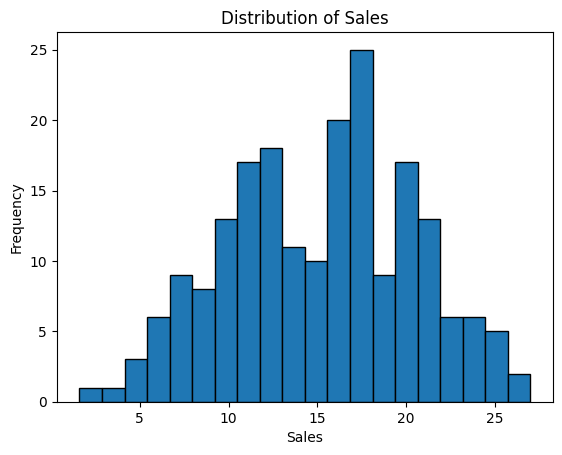

In [6]:
plt.hist(data['Sales'], bins=20,edgecolor='black', linewidth=1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()

The distribution of sales is approximately normal with no significant outliers.

#### Advertising Spend Analysis

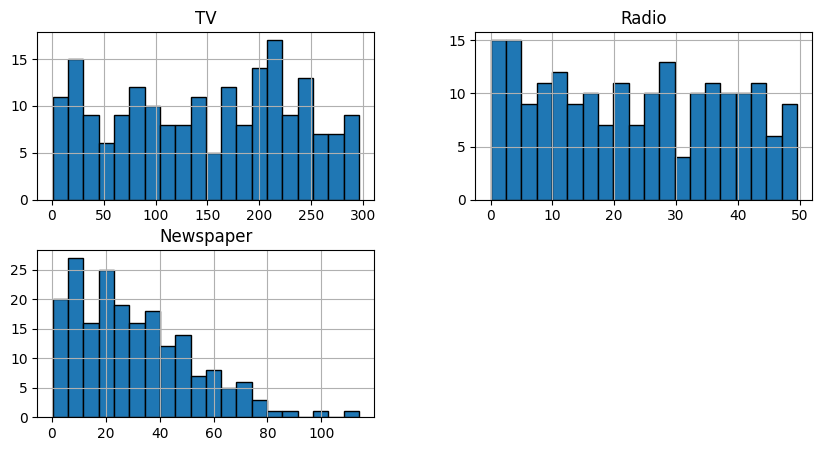

In [7]:
data[['TV', 'Radio', 'Newspaper']].hist(bins=20, figsize=(10,5), edgecolor='black', linewidth=1)
plt.show()


TV and Radio advertising budgets are more evenly distributed and stable, they can make strong predictors of sales, whereas Newspaper advertising shows high skewness and limited influence.

#### Relationship Between Ads & Sales

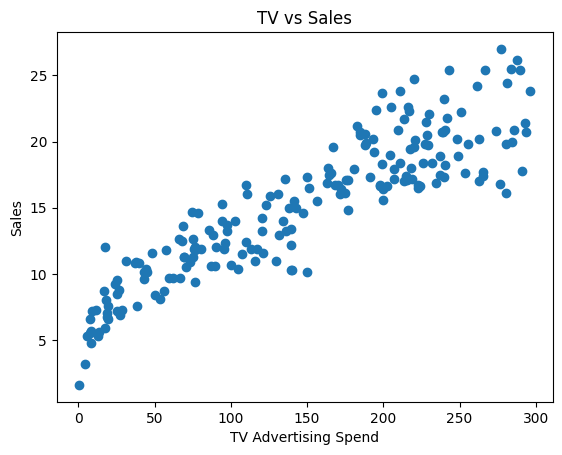

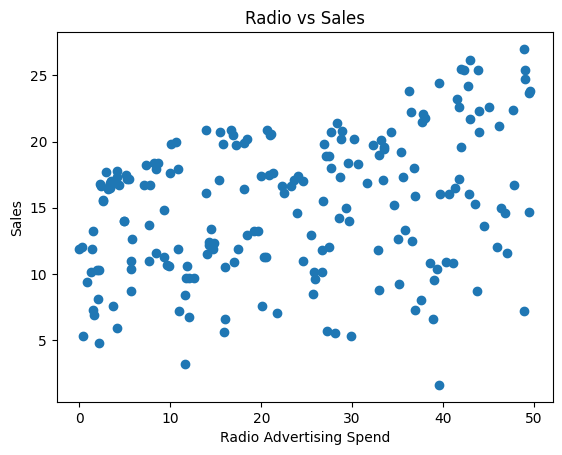

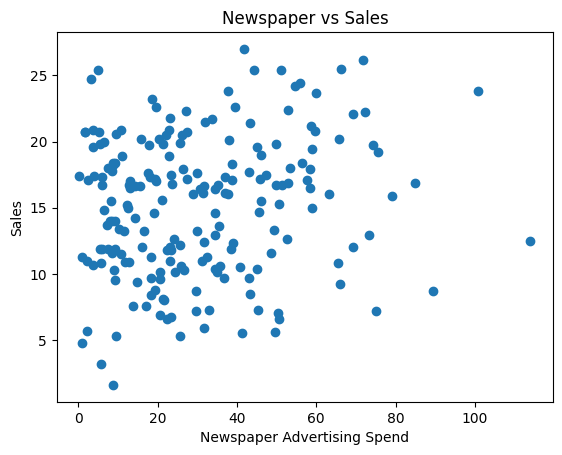

In [8]:
plt.scatter(data['TV'], data['Sales'])
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()


plt.scatter(data['Radio'], data['Sales'])
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()


plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel("Newspaper Advertising Spend")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")
plt.show()


There is a strong positive linear relationship between TV advertising spend and Sales. As TV advertising increases, sales increase consistently.

Radio advertising shows a moderate positive relationship with sales, though with higher variability compared to TV advertising. Radio advertising's impact is less consistent than TV advertising.

Newspaper advertising shows a weak and scattered relationship with sales.

#### Correlation Analysis

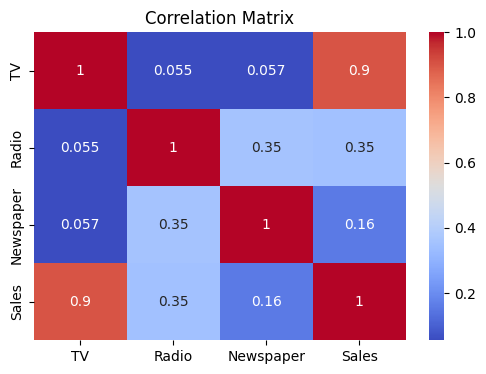

In [9]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


TV advertising has the highest correlation (0.9) with Sales, while "Newspaper" has minimal. Hence, TV is a strong predictor for Sales.

### Train-test Split

In [10]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Model build & Evaluate

In [12]:
## Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
## Make Predictions
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE : 1.2748262109549338
MSE : 2.9077569102710896
RMSE: 1.7052146229349223
R² Score: 0.9059011844150826


In [15]:
coeff_table = pd.DataFrame({
    "Feature": ["Intercept", "TV", "Radio", "Newspaper"],
    "Coefficient": [
        model.intercept_,
        model.coef_[0],
        model.coef_[1],
        model.coef_[2]
    ]
})

coeff_table

,Feature,Coefficient
0,Intercept,4.714126
1,TV,0.054509
2,Radio,0.100945
3,Newspaper,0.004337


**Intercept:** When no money is spent on advertising, the baseline sales are approximately 4.7 units.

**TV:** For every one-unit increase in TV advertising spend, sales increase by about 0.055 units.

**Radio:** For every one-unit increase in Radio advertising spend, sales increase by about 0.10 units, indicating a positive impact.

**Newspaper:** Newspaper advertising has a very small positive coefficient, suggesting it has minimal influence on sales.

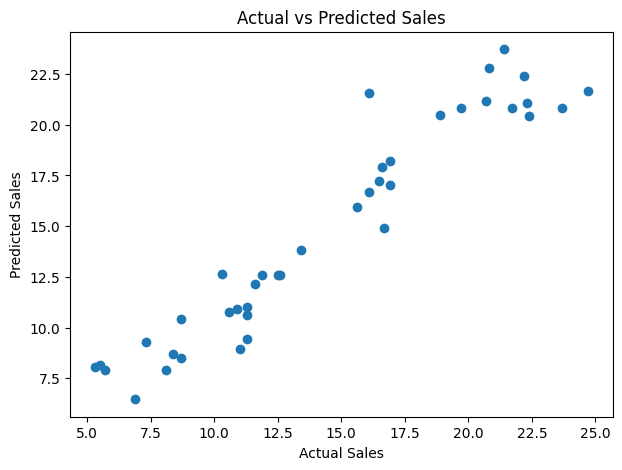

In [16]:
## Actual vs Predicted Sales
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [17]:
## Predict Sales for New Advertising Budget
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [25],
    'Newspaper': [20]
})

prediction = model.predict(new_data)
print("Predicted Sales:", prediction[0])


Predicted Sales: 15.50088402406167
